In [2]:
%reload_ext autoreload
%autoreload 2
from backend import load_data, data_wrangling, calculate_completion_rate, error_rate, drop_off_rate, statistic_func, calculate_avg_time_per_step
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


In [3]:
client_profiles, experiment_roster, web_group = load_data()

In [4]:
client_process_counts, final_rooster_process_counts_profile, control_profile_df, test_profile_df, web_group_experiment, client_profile_experiment = data_wrangling(web_group,experiment_roster,client_profiles)

# Running functions

# KPI

# Average Time per Step

In [5]:
calculate_avg_time_per_step(web_group_experiment,'Control')

process_step
step_1    0 days 00:30:38.781647281
step_2    0 days 00:00:39.342259834
step_3    0 days 00:09:35.220494575
confirm   0 days 18:21:17.307379630
Name: time_diff, dtype: timedelta64[ns]

In [6]:
calculate_avg_time_per_step(web_group_experiment,'Test')

process_step
step_1    0 days 00:22:19.804570955
step_2    0 days 00:01:51.212471355
step_3    0 days 00:12:18.920516488
confirm   1 days 05:00:32.783103231
Name: time_diff, dtype: timedelta64[ns]

In [7]:
calculate_avg_time_per_step(web_group_experiment,'Overall')

process_step
step_1    0 days 00:25:56.019441799
step_2    0 days 00:01:18.503631663
step_3    0 days 00:11:02.287741086
confirm   1 days 00:40:39.014174987
Name: time_diff, dtype: timedelta64[ns]

# Completion Rate

In [8]:
calculate_completion_rate(web_group_experiment,'Control')

65.58728539860616

In [9]:
calculate_completion_rate(web_group_experiment,'Test')

69.29323642835953

In [10]:
calculate_completion_rate(web_group_experiment)

67.56633663366337

# Error Rates

In [11]:
control_total_errors, control_total_steps, control_error_rate, control_average_error_per_step = error_rate(web_group_experiment,'Control')
control_average_error_per_step

process_step
0    17.828936
1     7.904139
2     9.163254
3     0.570301
4     0.000000
Name: process_step, dtype: float64

In [12]:
test_total_errors, test_total_steps, test_error_rate, test_average_error_per_step = error_rate(web_group_experiment,'Test')
test_average_error_per_step

process_step
0    23.550660
1     8.922307
2     7.421988
3     0.111995
4     0.000000
Name: process_step, dtype: float64

In [13]:
total_errors, total_steps, error_rate, average_error_per_step = error_rate(web_group_experiment)
average_error_per_step

process_step
0    20.933495
1     8.480916
2     8.214505
3     0.326562
4     0.000000
Name: process_step, dtype: float64

# Drop-off Rates

In [14]:
drop_off_rate(web_group_experiment,'Control')

,process_step,dropoff_rate
0,0,13.869299
1,1,7.453355
2,2,6.584450
3,3,11.410860
4,4,0.000000


In [15]:
drop_off_rate(web_group_experiment,'Test')

,process_step,dropoff_rate
0,0,9.040819
1,1,8.278732
2,2,6.186540
3,3,10.507160
4,4,0.000000


In [16]:
drop_off_rate(web_group_experiment)

,process_step,dropoff_rate
0,0,11.296829
1,1,7.904275
2,2,6.367948
3,3,10.918205
4,4,0.000000


# Statistics

# Hypothesis

-Null Hypothesis: The completion rate for the Test group 
(new design) is equal to the completion rate for the Control group (old design).

-Alternative Hypothesis: The completion rate for the Test group 
(new design) is not equal to the completion rate for the Control group (old design).

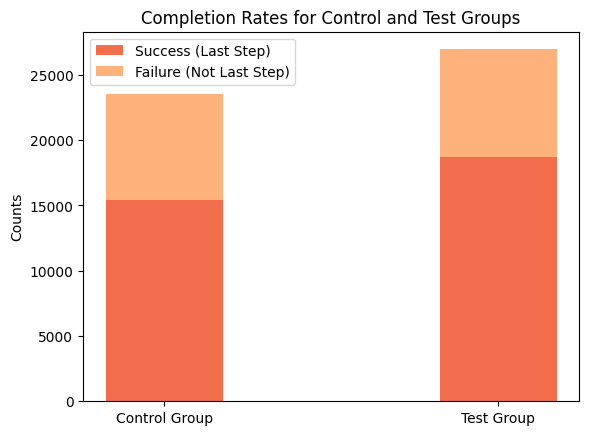

Z-statistic: -8.8745141890702
P-value: 7.023933247581432e-19
Reject the null hypothesis: There is evidence that completion rates are different.


In [250]:
completion_z_value, completion_p_value, completion_hypothesis = statistic_func(web_group_experiment, 'completition rate', 'two-proportion z-test', 0.05)

# Hypothesis

-Null Hypothesis: The completion rate for the Test group 
(new design) is equal to or less than the completion rate for the Control group (old design) increased by 5%.

-Alternative Hypothesis: The completion rate for the Test group 
(new design) is greater than the completion rate for the Control group (old design) increased by 5%.

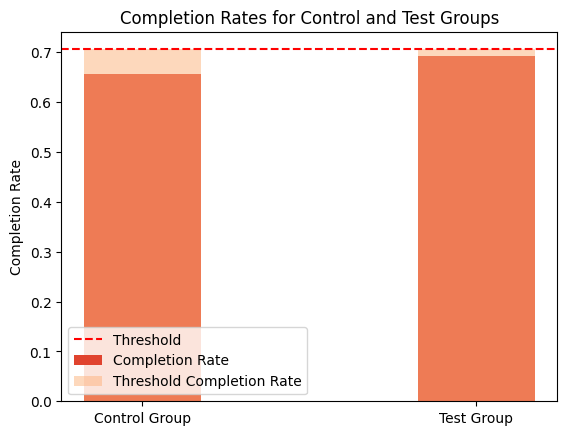

Z-statistic: -8.8745
P-value: 1.0000
Fail to reject the null hypothesis: There is no significant evidence that the completion rate for the Test group is greater than the Control group increased by 5%.


In [246]:
increase_5_z_value, increase_5_p_value, increase_5_hypothesis = statistic_func(web_group_experiment, '5% increase', 'one-sided z-test', 0.05)

# Hypothesis

-Null Hypothesis: The average client tenure of those engaging with 
the new process is equal to the average client tenure of those engaging with the old process.

-Alternative Hypothesis: The average client tenure of those engaging with 
the new process is different from the average client tenure of those engaging with the old process.

In [470]:
tenure_t_value, tenure_p_value, tenure_hypothesis = statistic_func(final_rooster_process_counts_profile, 'tenure years', 't-test',0.05)

T-statistic: 1.7115
P-value: 0.0870
Fail to reject the null hypothesis: There is no significant difference in the average tenure years between the Control and Test groups.


# Hypothesis

-Null Hypothesis: The average age of clients engaging with the 
new process is equal to the average age of clients engaging with the old process.

-Alternative Hypothesis: The average age of clients engaging with 
the new process is not equal to the average age of clients engaging with the old process.

In [471]:
age_t_value, age_p_value, age_hypothesis = statistic_func(final_rooster_process_counts_profile, 'age', 't-test',0.05)

T-statistic: 2.4161
P-value: 0.0157
Reject the null hypothesis: There is a significant difference in the average age between the Control and Test groups.


# Hypothesis

-Null Hypothesis: The proportion of clients engaging with the 
new process is the same for both genders.

-Alternative Hypothesis: The proportion of clients engaging with the
new process is different between genders.

In [13]:
gender_chi, gender_p_value, gender_hypothesis = statistic_func(final_rooster_process_counts_profile, 'gender', 'chi-test',0.05)

Chi-square statistic: 3.6235
P-value: 0.3051
Fail to reject the null hypothesis: There is no significant difference in the proportion of clients engaging with the new process across different gender categories.


In [49]:
acct_t_value, acct_p_value, acct_hypothesis = statistic_func(final_rooster_process_counts_profile, 'number of accounts', 't-test',0.05)

T-statistic: 2.0974
P-value: 0.0360
Reject the null hypothesis: There is a significant difference in the average number of accounts between the Control and Test groups.


In [88]:
bal_chi, bal_p_value, bal_hypothesis = statistic_func(final_rooster_process_counts_profile, 'balance', 'chi-test',0.05)

Chi-square statistic: 0.5220
P-value: 0.4700
Fail to reject the null hypothesis: There is no significant difference in the proportion of clients engaging with the new process across different balance categories.


In [5]:
acct_t_value, acct_p_value, acct_hypothesis = statistic_func(final_rooster_process_counts_profile, 'number of accounts', 'chi-test',0.05)

Chi-square statistic: 182.1466
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the proportion of clients engaging with the new process across different number of accounts categories.


In [90]:
calls_t_value, calls_p_value, calls_hypothesis = statistic_func(final_rooster_process_counts_profile, 'calls in the last 6 months', 'chi-test',0.05)

Chi-square statistic: 69.2095
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the proportion of clients engaging with the new process across different calls in the last 6 months categories.


In [91]:
logins_t_value, logins_p_value, logins_hypothesis = statistic_func(final_rooster_process_counts_profile, 'logins in the last 6 months', 'chi-test',0.05)

Chi-square statistic: 61.6392
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the proportion of clients engaging with the new process across different logins in the last 6 months categories.
